# **NLP - CA4 - Question 1**

**Parnian Fazel (810198516)**

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 8.4 MB/s 
     |████████████████████████████████| 86 kB 5.9 MB/s 
     |████████████████████████████████| 596 kB 49.9 MB/s 
     |████████████████████████████████| 6.6 MB 44.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 8.0 MB/s 
     |████████████████████████████████| 212 kB 70.8 MB/s 
     |████████████████████████████████| 86 kB 7.8 MB/s 
     |████████████████████████████████| 140 kB 62.8 MB/s 
     |████████████████████████████████| 1.1 MB 64.5 MB/s 
     |████████████████████████████████| 127 kB 72.5 MB/s 
     |████████████████████████████████| 271 kB 61.5 MB/s 
     |████████████████████████████████| 144 kB 79.1 MB/s 
     |████████████████████████████████| 94 kB 2.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.5.1
    Uninstalling dill-0.3.5.1:
      Successfully uninstalled dill-0.3.5.1
ERROR: pip's dependency resolver does not currently take into account all t

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm.auto import tqdm
from datasets import load_dataset, load_metric, Dataset
from transformers import BertTokenizer
from transformers import TrainingArguments, Trainer
from transformers import DefaultDataCollator
from transformers import AutoTokenizer
from transformers import TFAutoModel
from transformers import AutoModelForSequenceClassification
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## **Part 1**

In [ ]:
dataset = load_dataset("persiannlp/parsinlu_entailment")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/755 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1675 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/270 [00:00<?, ? examples/s]

Dataset parsinlu_reading_comprehension downloaded and prepared to /root/.cache/huggingface/datasets/persiannlp___parsinlu_reading_comprehension/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sent1', 'sent2', 'category', 'label'],
        num_rows: 755
    })
    test: Dataset({
        features: ['sent1', 'sent2', 'category', 'label'],
        num_rows: 1675
    })
    validation: Dataset({
        features: ['sent1', 'sent2', 'category', 'label'],
        num_rows: 270
    })
})

In [ ]:
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])
train_df

,sent1,sent2,category,label
0,زنان به قدری بخش بزرگی از نیروی کار را تشکیل م...,مردان بخش عظیمی از نیروی کار هستند بنابراین تن...,translation-train,c
1,سالها است که کنگره در تلاش است تا اثربخشی مدیر...,کنگره بودجه ویژه ای برای مدیریت اطلاعات و فناو...,translation-train,n
2,سرامیک‌های زیست خنثی پس از قرارگیری در بدن میز...,خواص فیزیکی سرامیک‌ها قابل اندازه گیری است.,natural-wiki,n
3,دولت از هیچ قانونی که منجر به کاهش چشمگیر توان...,قانونی که باعث کاهش استفاده از زغال سنگ به عنو...,translation-train,e
4,روش‌ها و الگوریتم‌های بهینه‌سازی به دو دسته ال...,آمار در دروس مدیریتی نقش مهمی را بازی میکند.,natural-wiki,n
...,...,...,...,...
750,قاسم رمضانپور پس از فارغ‌التحصیلی در مقطع کارش...,قاسم رمضان پور در آزمون اعزام به خارج، پذیرفته...,natural-wiki,c
751,اما پرزيدنت بوش هميشه احساس کرده است که سازمان...,پرزيدنت بوش بر نقش مهم سازمان ملل متحد تاکید کرد.,natural-voa,e
752,ویلاهای زیادی در تمام مسیر قرار دارد ولی کم کم...,ویلاهای بزرگ زیادی در طول مسیر وجود دارند ولی ...,translation-dev,n
753,خوب من فکر می کنم قانون LA,من فکر می کنم این قانون LA است زیرا یکی از دوس...,translation-train,n


e     304
n     245
c     205
xx      1
Name: label, dtype: int64


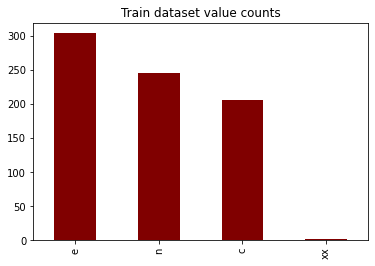

In [ ]:
print(train_df['label'].value_counts())
plt.title("Train dataset value counts")
train_df['label'].value_counts().plot.bar(color='maroon')

e    610
c    561
n    502
-      2
Name: label, dtype: int64


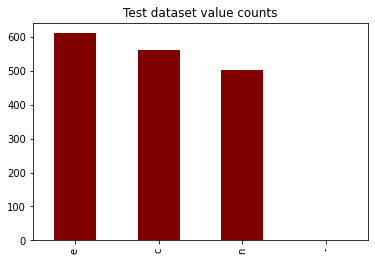

In [ ]:
print(test_df['label'].value_counts())
plt.title("Test dataset value counts")
test_df['label'].value_counts().plot.bar(color='maroon')

-----------------

In [ ]:
class Classifier:
    def __init__(self, model_checkpoint, train_column_name, test_column_name, preprocess = False, batch_size=32, seq_len=128):
      self.dataset = load_dataset("persiannlp/parsinlu_entailment")
      self.dataset = self.dataset.filter(lambda record: record['label'] in ["c", "e", "n"])
      self.encoded_dict = {'c' : 0, 'e': 1, 'n': 2}
      self.seq_len = seq_len
      self.model_checkpoint = model_checkpoint
      self.train_column_name = train_column_name
      self.test_column_name = test_column_name
      self.batch_size = batch_size
      self.preprocess = preprocess
      self.prepare_data()
      self.set_model_and_tokenizer()

    def encode_classes(self, df):
      return df.label.map(self.encoded_dict)

    def prepare_data(self):
      self.train_df = pd.DataFrame(self.dataset['train'])
      self.valid_df = pd.DataFrame(self.dataset['validation'])
      self.test_df = pd.DataFrame(self.dataset['test'])
      self.train_df['label'] = self.encode_classes(self.train_df)
      self.valid_df['label'] = self.encode_classes(self.valid_df)
      self.test_df['label'] = self.encode_classes(self.test_df)  
      if self.preprocess:
        self.train_df = self.clean_data(self.train_df)
        self.valid_df = self.clean_data(self.valid_df)
        self.test_df = self.clean_data(self.test_df)


    def set_model_and_tokenizer(self):
      if self.model_checkpoint != 'xlm-roberta-base':
        self.tokenizer = AutoTokenizer.from_pretrained(self.model_checkpoint)
        self.bert = TFAutoModel.from_pretrained(self.model_checkpoint)
      else: 
        self.tokenizer = AutoTokenizer.from_pretrained(self.model_checkpoint, from_pt=True)
        self.bert = TFAutoModel.from_pretrained(self.model_checkpoint, from_pt=True)
      self.bert.trainable = True

    def get_tokenized_ids(self, df, column_name):
      record_len = len(df)
      input_ids = np.zeros((record_len, self.seq_len))
      mask_ids = np.zeros((record_len, self.seq_len))

      for i, row in df.iterrows():
        input_data = row['sent1'], row['sent2']
        tokens = self.tokenizer.encode_plus(input_data, max_length=self.seq_len, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
        input_ids[i, :] = tokens['input_ids']
        mask_ids[i, :] = tokens['attention_mask']

      class_values = df['label'].values
      labels = np.zeros((record_len, class_values.max()+1))
      labels[np.arange(record_len), class_values] = 1 #one-hot encoding
      return input_ids, mask_ids, labels

    def dataset_mapper(self, input_ids, masks, labels):
      return {'input_ids': input_ids, 'attention_mask': masks}, labels

    def get_dataset(self, df, column_name):
      input_ids, mask_ids, labels = self.get_tokenized_ids(df, column_name)
      dataset = tf.data.Dataset.from_tensor_slices((input_ids, mask_ids, labels))
      dataset = dataset.map(self.dataset_mapper)
      return dataset.batch(self.batch_size, drop_remainder=True)

    def create_model(self):
      input_ids = tf.keras.layers.Input(shape=(128,), name='input_ids', dtype='int32')
      mask = tf.keras.layers.Input(shape=(128,), name='attention_mask', dtype='int32')
      embeddings = self.bert(input_ids, attention_mask=mask).pooler_output
      drop_output = tf.keras.layers.Dropout(0.6)(embeddings)
      output = tf.keras.layers.Dense(1024, activation='relu')(drop_output)
      output = tf.keras.layers.Dense(3, activation='softmax', name='outputs')(output)
      model = tf.keras.Model(inputs=[input_ids, mask], outputs=output)
      optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
      loss = tf.keras.losses.CategoricalCrossentropy()
      acc = tf.keras.metrics.CategoricalAccuracy('accuracy')
      model.compile(optimizer=optimizer, loss=loss, metrics=[acc])
      print(model.summary())
      return model

    def train_and_evaluate_model(self, model):
      train_dataset = self.get_dataset(self.train_df, self.train_column_name)
      valid_dataset = self.get_dataset(self.valid_df, self.train_column_name)
      input_ids_test, mask_ids_test, labels_test = self.get_tokenized_ids(self.test_df, self.test_column_name)
      history = model.fit(train_dataset, validation_data=valid_dataset, epochs=10)
      score = model.evaluate([input_ids_test, mask_ids_test], labels_test, verbose=0)
      predictions = np.argmax(model.predict([input_ids_test, mask_ids_test]), axis=1)
      self.print_results(score, predictions, self.test_df['label'])
      self.plot_results(history)
      self.print_confusion_matrix(self.test_df['label'].to_list(), predictions)
      return model, history, score, predictions

    def clean_text(self, text):
      lemmatizer = WordNetLemmatizer()
      tokens = nltk.word_tokenize(text)
      tokens = [word.lower() for word in tokens]
      tokens = [word for word in tokens if not word in nltk_stopwords.words("english")]
      tokens = [lemmatizer.lemmatize(word) for word in tokens]
      return tokens

    def clean_data(self, df):
      for i, row in df.iterrows():
        row['sent1'] =  self.clean_text(row['sent1'])
        row['sent2'] =  self.clean_text(row['sent2'])
      return df

    def plot_results(self, history):
      plt.style.use('seaborn')
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_figheight(4)
      fig.set_figwidth(12)
      
      ax1.plot(history.history["accuracy"], label = "Train")
      ax1.plot(history.history["val_accuracy"], label ="Validation")
      ax1.set_ylabel("Accuracy")
      ax1.set_xlabel("Epoch")
      ax1.legend()

      ax2.plot(history.history["loss"], label = "Train")
      ax2.plot(history.history["val_loss"], Label = "Validation")
      ax2.set_ylabel("Loss")
      ax2.set_xlabel("Epoch")
      ax2.legend()

      fig.suptitle(f"Results for {self.model_checkpoint} Model", fontsize="x-large", y=1.05)
      plt.tight_layout()
      plt.show()

    def print_confusion_matrix(self, y_test, y_pred):
      conf_mat = confusion_matrix(y_test, y_pred)
      ax = plt.subplot()
      sns.heatmap(conf_mat, annot = True, ax = ax, linewidths = 5, linecolor = 'y', center = 0)
      ax.set_title(f"Confusion Matrix for {self.model_checkpoint} Model")
      ax.set_xlabel('Predicted Labels') 
      ax.set_ylabel('True Labels')
      ax.xaxis.set_ticklabels(['Contradiction', 'Entailment', 'Neutral'])
      ax.yaxis.set_ticklabels(['Contradiction', 'Entailment', 'Neutral'])
      plt.show()

    def print_results(self, score, predictions, true_labels):
      print("Loss on test data:", score[0])
      print("Accuracy on test data:", score[1])
      print("Classification Report:")
      print(classification_report(true_labels, predictions, target_names=['c', 'e', 'n']))
      for i, classification in enumerate(['Contradiction', 'Entailment', 'Neutral']):
        fpr, tpr, thresholds = metrics.roc_curve(np.array(true_labels.to_list()), np.array(predictions), pos_label=i)
        auc_res = metrics.auc(fpr, tpr)
        print(f"AUC - {classification}: ", auc_res)

# **Part 2**

Reusing dataset parsinlu_reading_comprehension (/root/.cache/huggingface/datasets/persiannlp___parsinlu_reading_comprehension/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached processed dataset at /root/.cache/huggingface/datasets/persiannlp___parsinlu_reading_comprehension/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d/cache-529a0281b0d3584e.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/persiannlp___parsinlu_reading_comprehension/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d/cache-d8f7f5d85f4b66b0.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/persiannlp___parsinlu_reading_comprehension/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d/cache-243e61f70d6b1364.arrow
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing TFXLMRobertaModel from a P

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tfxlm_roberta_model_2 (TFXLMRo  TFBaseModelOutputWi  278043648  ['input_ids[0][0]',              
 bertaModel)                    thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


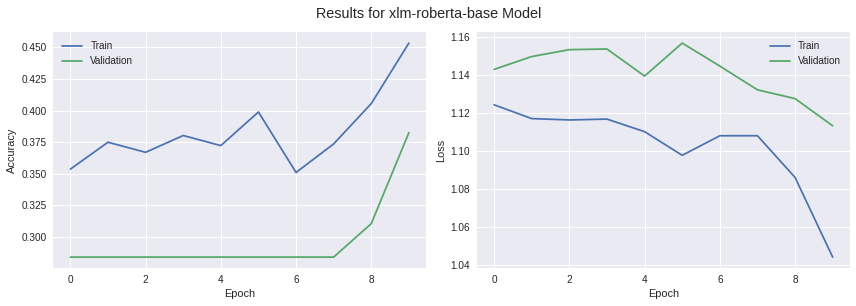

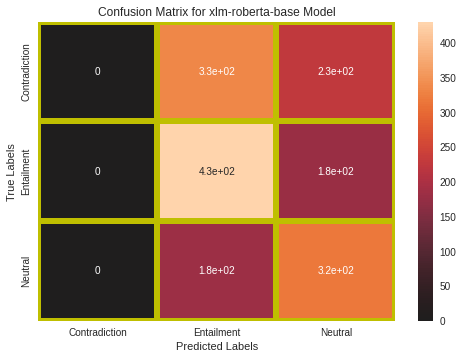

In [ ]:
classifier = Classifier('xlm-roberta-base', '', '',  False, batch_size=8, seq_len=128)
part2_model = classifier.create_model()
part2_model, part2_history, part2_score, part2_predictions = classifier.train_and_evaluate_model(part2_model)

## **With preprocessing**

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/755 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1675 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/270 [00:00<?, ? examples/s]

Dataset parsinlu_reading_comprehension downloaded and prepared to /root/.cache/huggingface/datasets/persiannlp___parsinlu_reading_comprehension/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tfxlm_roberta_model (TFXLMRobe  TFBaseModelOutputWi  278043648  ['input_ids[0][0]',              
 rtaModel)                      thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

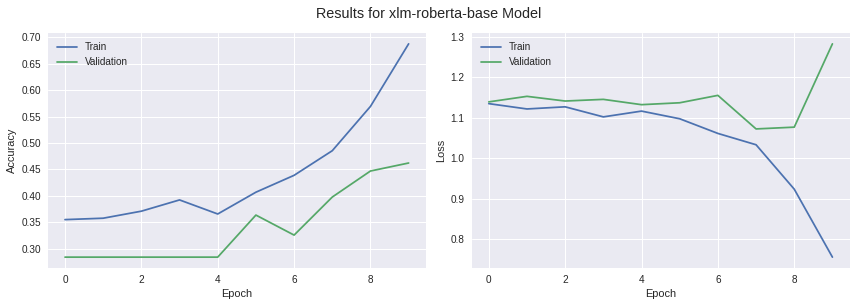

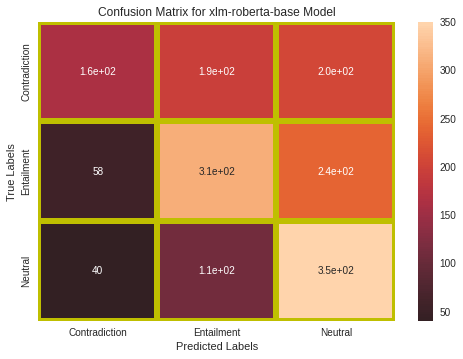

In [ ]:
classifier = Classifier('xlm-roberta-base', '', '', True, batch_size=8, seq_len=128)
part2_model_pr = classifier.create_model()
part2_model_pr, part2_history_pr, part2_score_pr, part2_predictions_pr = classifier.train_and_evaluate_model(part2_model_pr)

## **Part 3**

Reusing dataset parsinlu_reading_comprehension (/root/.cache/huggingface/datasets/persiannlp___parsinlu_reading_comprehension/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached processed dataset at /root/.cache/huggingface/datasets/persiannlp___parsinlu_reading_comprehension/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d/cache-529a0281b0d3584e.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/persiannlp___parsinlu_reading_comprehension/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d/cache-d8f7f5d85f4b66b0.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/persiannlp___parsinlu_reading_comprehension/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d/cache-243e61f70d6b1364.arrow


Downloading:   0%|          | 0.00/434 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/919M [00:00<?, ?B/s]

Some layers from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  162841344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

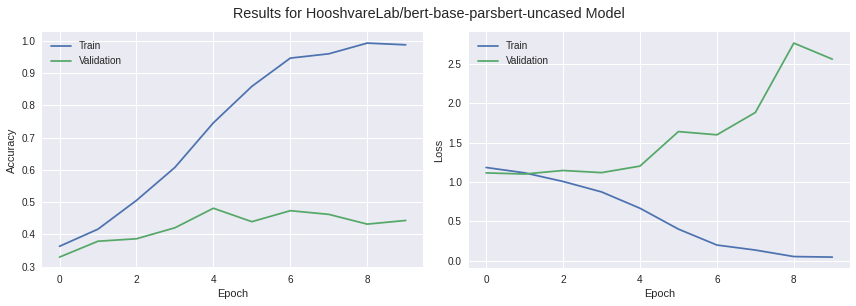

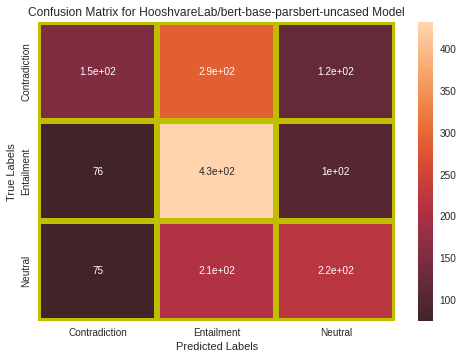

In [ ]:
classifier_ParsBert = Classifier('HooshvareLab/bert-base-parsbert-uncased', '', '',  batch_size=8, seq_len=128)
part3_model = classifier_ParsBert.create_model()
part3_model, part3_history, part3_score, part3_predictions = classifier_ParsBert.train_and_evaluate_model(part3_model)

## **With preprocessing**

Reusing dataset parsinlu_reading_comprehension (/root/.cache/huggingface/datasets/persiannlp___parsinlu_reading_comprehension/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached processed dataset at /root/.cache/huggingface/datasets/persiannlp___parsinlu_reading_comprehension/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d/cache-529a0281b0d3584e.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/persiannlp___parsinlu_reading_comprehension/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d/cache-d8f7f5d85f4b66b0.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/persiannlp___parsinlu_reading_comprehension/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d/cache-243e61f70d6b1364.arrow


Downloading:   0%|          | 0.00/434 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/919M [00:00<?, ?B/s]

Some layers from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  162841344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

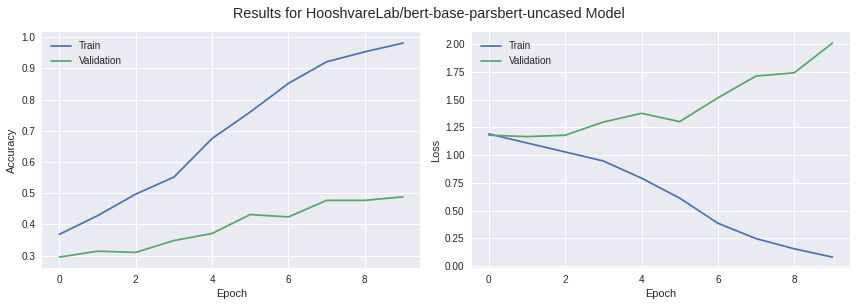

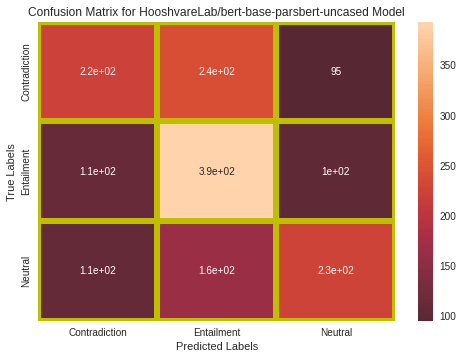

In [ ]:
classifier_ParsBert = Classifier('HooshvareLab/bert-base-parsbert-uncased', '', '', True, batch_size=8, seq_len=128)
part3_model = classifier_ParsBert.create_model()
part3_model, part3_history, part3_score, part3_predictions = classifier_ParsBert.train_and_evaluate_model(part3_model)